In [67]:
import skimage 
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [68]:
#suppress warnings for clea notebook
import warnings
warnings.filterwarnings('ignore')

In [69]:

img=cv2.imread("./test_images/sharapova1.jpg")
img.shape


(555, 700, 3)

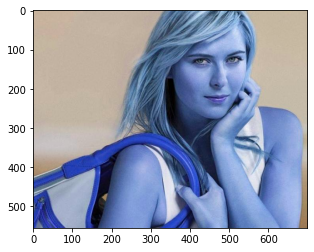

In [70]:
plt.imshow(img)

In [71]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [72]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

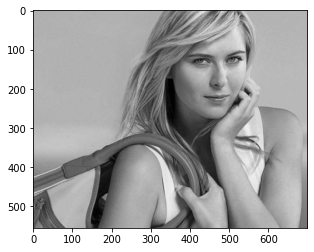

In [73]:
plt.imshow(gray , cmap='gray')

In [74]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')


faces =face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [75]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

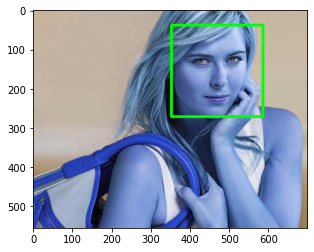

In [76]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(face_img)

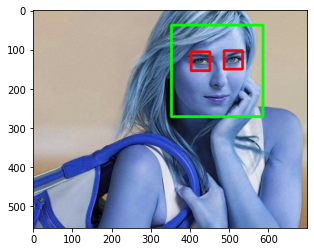

In [77]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img= cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
    roi_gray= gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),5)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
        

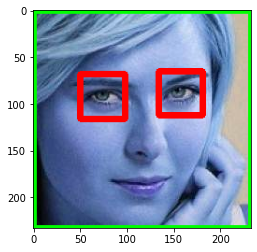

In [78]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [79]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        
        

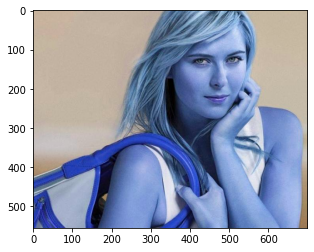

In [80]:
original_image=cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

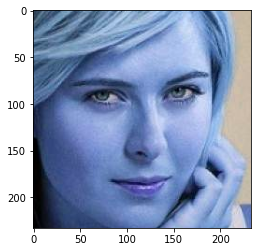

In [81]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

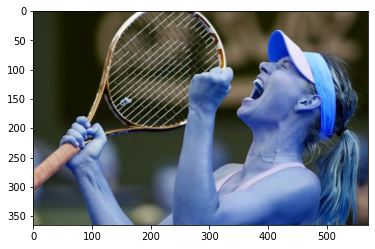

In [82]:
org_image=cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image)

In [83]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [84]:
path_to_data='./dataset/'
path_to_cr_data="./dataset/cropped/"

In [85]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    

In [86]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [87]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [88]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating croppedd images in folder",cropped_folder)
                
            
            cropped_file_name=celebrity_name + str(count) + ".png"
            cropped_file_path=cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            
         
            

    

generating croppedd images in folder ./dataset/cropped/lionel_messi
generating croppedd images in folder ./dataset/cropped/maria_sharapova
generating croppedd images in folder ./dataset/cropped/roger_federer
generating croppedd images in folder ./dataset/cropped/serena_williams
generating croppedd images in folder ./dataset/cropped/virat_kohli


In [103]:
import numpy as np
import pywt
import cv2
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray =cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray,mode, level=level)

    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;

    imArray_H = pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H =np.uint8(imArray_H)
    return imArray_H

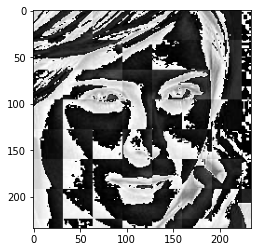

In [104]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [105]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    
    
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list 
celebrity_file_names_dict    



{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [106]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count= count + 1
class_dict    

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [108]:
X=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img= cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har= w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img= np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [109]:
len(X)

165

In [110]:
len(X[0])

4096

In [111]:
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(165, 4096)

In [112]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

**Training the model**

In [113]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [120]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)
pipe =Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9047619047619048

In [121]:
len(X_test)

42

In [122]:
print(classification_report(y_test,pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      0.91      0.95        11
           2       1.00      0.71      0.83         7
           3       0.80      1.00      0.89         4
           4       0.86      1.00      0.92        12

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.89        42
weighted avg       0.92      0.90      0.90        42



**Finding different paramets using Grid Search CV**

In [133]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [158]:
model_params ={
    'svm':{
        'model': svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,20,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
         'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
           'logisticregression__C':[1,5,10]
        }
    }
    
}

In [161]:
scores =[]
best_estimators={}
import pandas as pd
for algo, mp in model_params.items():
    pipe= make_pipeline(StandardScaler(), mp['model'])
    clf =GridSearchCV(pipe,mp['params'],cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })
    best_estimators[algo]=clf.best_estimator_
    
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.812333,"{'svc__C': 20, 'svc__kernel': 'rbf'}"
1,random_forest,0.648333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.836667,{'logisticregression__C': 1}


In [156]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=20, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [151]:
best_estimators['svm'].score(X_test,y_test)

0.9047619047619048

In [152]:
best_estimators['random_forest'].score(X_test,y_test)

0.6904761904761905

In [163]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9761904761904762

In [164]:
best_clf=best_estimators['logistic_regression']

In [167]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0,  6,  1,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

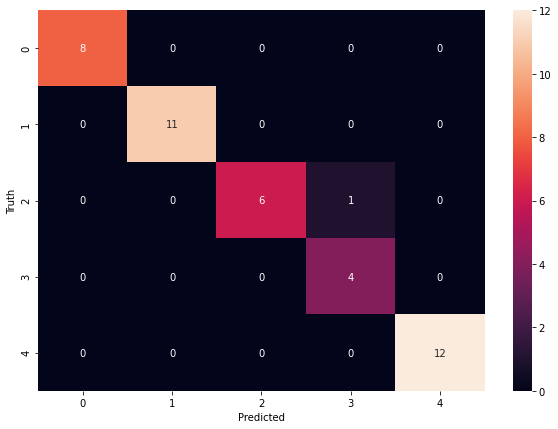

In [169]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [170]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

**saving trained model**

In [172]:
import joblib

joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

**saving class dictionary**

In [173]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict)) 